![title](tabelas.png)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


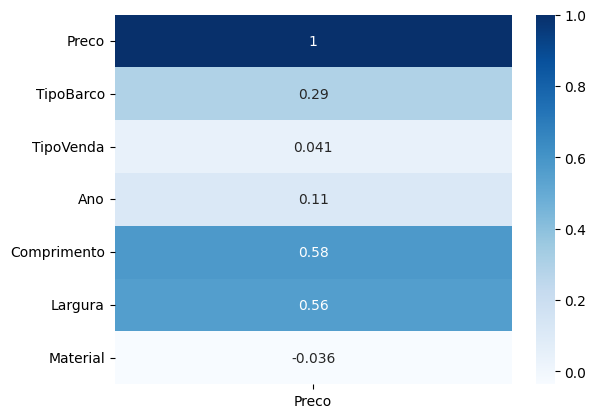

0.4244781875143623
0.86974889166426


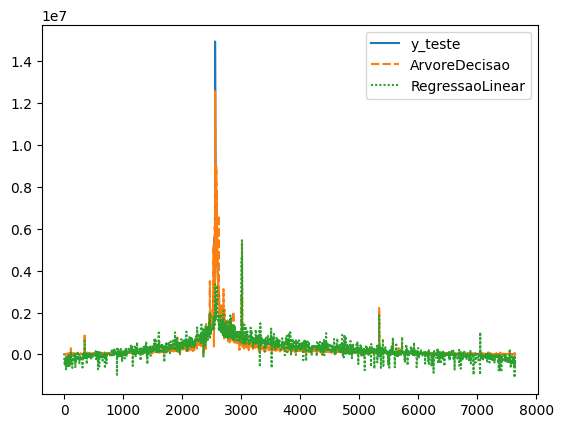

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 8728.89 10864.5  21019.95]


In [15]:
import pandas as pd
import numpy
import openpyxl
import plotly
import seaborn as sns
import matplotlib.pyplot as plt

#importanção dos dados

tabela = pd.read_csv("barcos_ref.csv");
display(tabela);

#tratamento dos dados

print(tabela.info());

#realizando a correlação entre as informações da base de dados

correlacao = tabela.corr()[["Preco"]];
display(correlacao);

#criação do gráfico
sns.heatmap(correlacao, cmap="Blues", annot=True);
plt.show();

#modelagem e criação do algoritmo

y = tabela["Preco"];
x = tabela.drop("Preco", axis=1);

#train test split

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3);

#importação da inteligência artificial
# Regressão linear e Arvore de decisão

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criação da inteligência artificial
modelo_regressaolinear = LinearRegression();
modelo_arvoredecisao = RandomForestRegressor();

#treinando 
modelo_regressaolinear.fit(x_treino, y_treino);
modelo_arvoredecisao.fit(x_treino, y_treino);

RandomForestRegressor();

#interpretação dos resultados para garantir qual IA teve mais eficiência 

from sklearn.metrics import r2_score

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste);
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste);

print(r2_score(y_teste, previsao_regressaolinear));
print(r2_score(y_teste, previsao_arvoredecisao));


#visualização 

tabela_aux = pd.DataFrame();
tabela_aux["y_teste"] = y_teste;
tabela_aux["ArvoreDecisao"] = previsao_arvoredecisao;
tabela_aux["RegressaoLinear"] = previsao_regressaolinear;

sns.lineplot(data=tabela_aux);
plt.show()

#refazer previsões para atualização de preços

tabela_nov = pd.read_csv("novos_barcos.csv");
display(tabela_nov);

previsao = modelo_arvoredecisao.predict(tabela_nov);
print(previsao);
